In [111]:
#Question--1_____Part--1

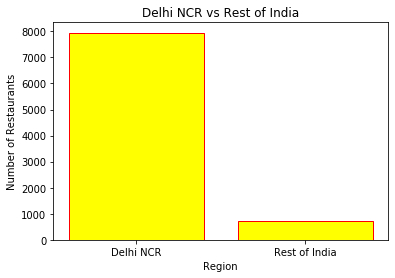

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("zomato.csv",encoding = "ISO-8859-1")  
df = data.copy()

df = df[df["Country Code"] == 1] #filtering the rows having country code 1..
a = df[(df["City"] == "New Delhi") | (df["City"] == "Ghaziabad") | (df["City"] == "Noida") | (df["City"] ==  "Gurgaon") | (df["City"] ==  "Faridabad")]  #created a new database having cities of delhi ncr
locations = ["Delhi NCR","Rest of India"]
restaurants = [a.shape[0],df.shape[0]-a.shape[0]]  #finding number of restaurants with the help of there shapes...
plt.bar(locations,restaurants,width = 0.8,color = "yellow",edgecolor = "red")
plt.xlabel("Region")
plt.ylabel("Number of Restaurants")
plt.title("Delhi NCR vs Rest of India")
plt.show()

In [24]:
#Question--1_____Part--2

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("zomato.csv",encoding = "ISO-8859-1")
df=data.copy()
df = df[df["Country Code"] == 1] #filtering the rows having country code 1..
#created 2 sets...one for cuisines of delhi ncr and other one for rest of india...used set to avoid repeatation and at last subtracted rest of india set from delhi ...to find out the cusines served in rest of india but not in  delhi ncr
sr = set()
sd = set()
for i in df.index:
    if df["City"][i] in ["New Delhi", "Ghaziabad", "Noida", "Gurgaon", "Faridabad"]:
        c = df["Cuisines"][i].strip().split(',')
        for j in c:
            sd.add(j.strip())
    else:
        c = df["Cuisines"][i].strip().split(',')
        for j in c:
            sr.add(j.strip())
for i in (sr-sd):
    print(i)  #from below code we can see that BBQ and german are  served in delhi ncr...answer is wrong due to incomplete information..

Malwani
BBQ
German
Cajun


In [26]:
#checked using zomata api ..that weather these cuisines are really not found in delhi ncr or answer is wrong due to incomplete information..
import requests
import json
sd1 = set()
h = {'User-Agent':'Uditanshu', 'Accept':'application/json' , 'user_key':'00f365a0ca06c3868355649f6af592dc'}
r = requests.get('https://developers.zomato.com/api/v2.1/cuisines?city_id=1',headers = h)
details = r.json()
for i in details.get("cuisines"):
    sd1.add(i["cuisine"]['cuisine_name'])
for i in sd1:
    if i in (sr-sd):
        print(i) #here we can see that BBQ and german are served in delhi NCR

German
BBQ


In [139]:
#Question--1_____Part--3

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("zomato.csv",encoding = "ISO-8859-1")
df = data.copy()
df = df[df["Country Code"] == 1] #filtering the rows having country code 1..
delhi = {}
rest = {}
#created 2 dictionaries one for the cuisines of delhi ncr and another one for the cuisines of rest of india...where values are number of restaurants in which it is served and keys are name of the cuisines..
for i in df.index:
    c = df["Cuisines"][i].strip().split(',')
    if df["City"][i] in ["New Delhi", "Ghaziabad", "Noida", "Gurgaon", "Faridabad"]:
        for j in c:
            delhi[j.strip()] = delhi.get(j.strip(),0) + 1
    else:
        for j in c:
            rest[j.strip()] = rest.get(j.strip(),0) + 1
            
rest_sorted = sorted(rest, key = rest.get, reverse = True)[0:10]  #sorting the cuisines names according to the no of restaurants in which it is served..
delhi_sorted = sorted(delhi ,key = delhi.get, reverse = True)[0:10]
delhi1 = []
rest1 = []
#printing the top 10 cuisines...of both the locations....
print("Top 10 cuisines served by maximum number of restaurants in Delhi NCR")
print()
for i in delhi_sorted:
    delhi1.append(delhi[i])
    print(i)
print()
print()
print("Top 10 cuisines served by maximum number of restaurants in Rest of India")
print()
for i in rest_sorted:
    rest1.append(rest[i])
    print(i)

Top 10 cuisines served by maximum number of restaurants in Delhi NCR

North Indian
Chinese
Fast Food
Mughlai
Bakery
South Indian
Continental
Desserts
Street Food
Italian


Top 10 cuisines served by maximum number of restaurants in Rest of India

North Indian
Chinese
Continental
Italian
Cafe
Fast Food
South Indian
Mughlai
Desserts
Mexican


In [ ]:
#Question--1_____Part--4

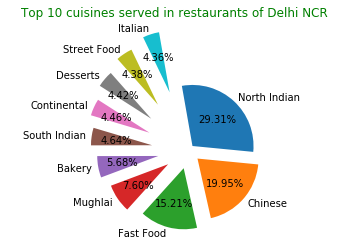

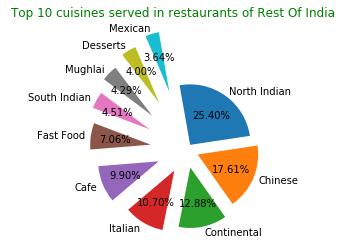

In [37]:
import matplotlib.pyplot as plt
explode = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
#pie chart plotted separately for restaurants of delhi ncr and rest of india...through this graph graph we can see that which dish is served in how many restaurants of that loaction.. 
plt.pie(delhi1,labels=delhi_sorted,autopct = "%.2f%%",explode=explode,counterclock = False,startangle = 100)
plt.title("Top 10 cuisines served in restaurants of Delhi NCR",color = "green")
plt.axis("equal")
plt.show()
plt.pie(rest1,labels=rest_sorted,autopct = "%.2f%%",explode=explode,counterclock = False,startangle = 100)
plt.title("Top 10 cuisines served in restaurants of Rest Of India ",color = "green")
print()
plt.axis("equal")
plt.show()

In [ ]:
#Question--2_____Part--1...1

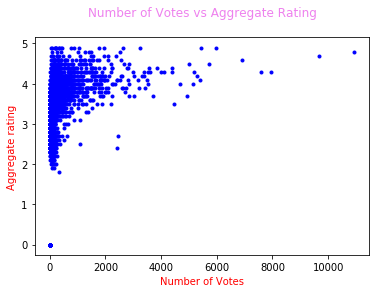

In [28]:
import matplotlib.pyplot as plt
#scatter graph plotted to see how number of votes effecting aggregate rating.....
plt.scatter(df["Votes"],df["Aggregate rating"],color = "blue",marker=".")
plt.xlabel("Number of Votes",color="red")
plt.ylabel("Aggregate rating",color="red")
plt.title("Number of Votes vs Aggregate Rating\n",color="violet")
plt.show()

In [6]:
#Question--2_____Part--1...2

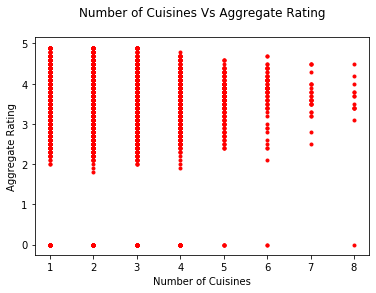

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("zomato.csv",encoding = "ISO-8859-1")
df = data.copy()
df.dropna(subset=["Cuisines"],inplace = True)   #removing the rows having nan's in cuisine column...
no_of_cuisines = []   
#traversing through cuisines column and calculated number of cuisines served in each restaurant...
for i in df["Cuisines"]:
    no_of_cuisines.append(len(i.strip().split(',')))
plt.scatter(no_of_cuisines,df["Aggregate rating"],color = "red",marker=".") 
plt.xlabel("Number of Cuisines")
plt.ylabel("Aggregate Rating")
plt.title("Number of Cuisines Vs Aggregate Rating\n")
plt.show()

In [ ]:
#Question--2_____Part--1...3

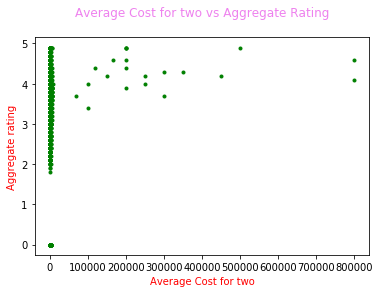

In [21]:
import matplotlib.pyplot as plt
plt.scatter(df["Average Cost for two"],df["Aggregate rating"],color = "green",marker=".") #scatter graph plotted between average cost of two and aggregate rating...
plt.xlabel("Average Cost for two",color="red")
plt.ylabel("Aggregate rating",color="red")
plt.title("Average Cost for two vs Aggregate Rating\n",color="violet")
plt.show()

In [ ]:
#Question--2_____Part--1...4

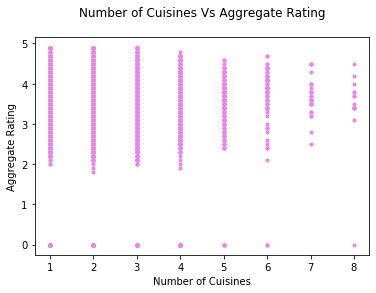

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("zomato.csv",encoding = "ISO-8859-1")
df = data.copy()
df.dropna(subset=["Cuisines"],inplace = True)   #removing the rows having nan's in cuisine column...
no_of_cuisines = []   
#traversing through cuisines column and calculated number of cuisines served in each restaurant...
for i in df["Cuisines"]:
    no_of_cuisines.append(len(set(i.strip().split(','))))
plt.scatter(no_of_cuisines,df["Aggregate rating"],color = "violet",marker=".") 
plt.xlabel("Number of Cuisines")
plt.ylabel("Aggregate Rating")
plt.title("Number of Cuisines Vs Aggregate Rating\n")
plt.show()

In [ ]:
#Question--2_____Part--2..

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("zomato.csv",encoding = "ISO-8859-1")
df = data.copy()

#here ...we are taking 2 dictionaries...both of them having locality name as the key..and one having value summation of votes*rating and other one having value summation of number of votes....
vr = {}
v = {}
for i in df.index:
    locality = df["Locality"][i].strip()
    votes = df["Votes"][i]
    rating = df["Aggregate rating"][i]
    vr[locality] = vr.get(locality,0) + (votes*rating)
    v[locality] = v.get(locality,0) + votes
#created one more dictionary for calculating weighted restaurant rating for each locality....
wrr = {}
for i in vr:
    if v[i] == 0:
        wrr[i] = 0
    else:
        wrr[i] = vr[i]/v[i]
wrr1 = sorted(wrr ,key = wrr.get, reverse = True)[0:10]  #sorting the localities according to there weighted restaurant rating....and filtering out the top 10 among them...

for i in wrr1:
    print(i)

Sofitel Philippine Plaza Manila, Pasay City
Setor De Clubes Esportivos Sul
Gíçvea
The Milk District
Windermere
Paia
Kenwood
New Tampa
Venetian Village, Al Maqtaa
Deira City Centre Area


In [39]:
#Question--3_____Part--1

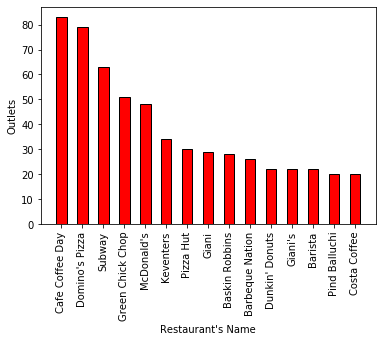

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
zomato = pd.read_csv("zomato.csv",encoding = "ISO-8859-1")
df = zomato.copy()
d = {}
#created a dictionary where key is name of the restaurant and value is number of it's outlets..
for i in df["Restaurant Name"]:
    d[i] = d.get(i,0) + 1
restaurants = sorted(d ,key = d.get, reverse = True)[0:15]  #sorting the restaurants according to there number of outlets..
outlets = []
for i in restaurants:
    outlets.append(d[i])
plt.bar(restaurants,outlets,width = 0.5,color = "red",edgecolor = "black")
plt.xticks(rotation = 90)
plt.xlabel("Restaurant's Name")
plt.ylabel("Outlets")
plt.show()

In [40]:
#Question--3_____Part--2

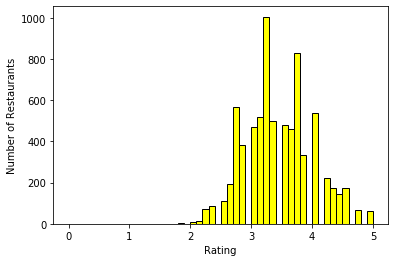

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
zomato = pd.read_csv("zomato.csv",encoding = "ISO-8859-1")
df = zomato.copy()
df = df[df["Aggregate rating"] != 0.0]  #removing the unrated ones's
ar = []
#created a list to store ratings of all  the restaurants and created a histogram out of it..to see how  many restaurants has what rating..
for i in df.index:
    ar.append(df["Aggregate rating"][i])
p = np.arange(0,5.1,0.1)
plt.hist(ar,bins = p,edgecolor = "black",color = "yellow")
plt.xlabel("Rating")
plt.ylabel("Number of Restaurants")
plt.show()

In [41]:
#Question--3_____Part--3

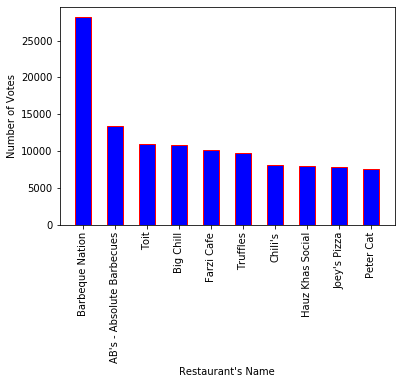

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
zomato = pd.read_csv("zomato.csv",encoding = "ISO-8859-1")
df = zomato.copy()
d = {}
#created a dictionary where key is restaurant's name and value is number of votes ...
for i in df.index:
    d[df["Restaurant Name"][i].strip()] = d.get(df["Restaurant Name"][i].strip(),0) + df["Votes"][i]
d1 = sorted(d,key = d.get,reverse = True)[0:10]  #sorting the names according to the number of votes...
res = []
votes = []
for i in d1:
    res.append(i)
    votes.append(d[i])
plt.bar(res,votes,width = 0.5 , color = "blue",edgecolor = "red")
plt.xlabel("Restaurant's Name")
plt.ylabel("Number of Votes")
plt.xticks(rotation = 90)
plt.show()

In [42]:
#Question--3_____Part--4

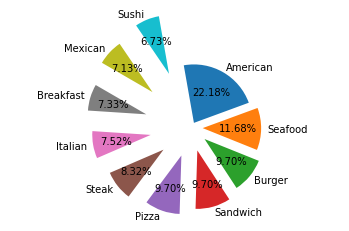

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
zomato = pd.read_csv("zomato.csv",encoding = "ISO-8859-1")
df = zomato.copy()
df = df[df["Country Code"] == 216]  #filtered out the rows having country code 216...
df.dropna(subset = ["Cuisines"] , inplace = True)  #droped the rows having nan values in cuisine column
d = {}  #created a dictionary where key is cuisine name and value is number of restaurants in which it is served...
for i in df["Cuisines"]:
    if "," in i:
        for j in i.strip().split(','):
            d[j.strip()] = d.get(j.strip(),0) + 1
    else:
        d[i.strip()] = d.get(i.strip(),0) + 1
d1 = sorted(d,key = d.get,reverse = True)[0:10]  #sorting the cuisines according to their values..ie number of restaurants in which it is served..
cuisine = []
votes = []
for i in d1:
    cuisine.append(i)
    votes.append(d[i])
explode = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.pie(votes,labels = cuisine,explode=explode,autopct = "%.2f%%",counterclock = False,startangle = 100) 
plt.axis("equal")
plt.show()

In [47]:
#Question--3_____Part--5

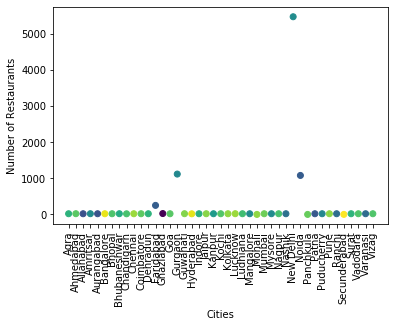

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
zomato = pd.read_csv("zomato.csv",encoding = "ISO-8859-1")
df = zomato.copy()
df = df[df["Country Code"] == 1]   #filtered out the rows having country code 1...
#Create 3 dictionaries all having key the city name and first one having value the multiplication of votes and rating and second one having value the number of votes and third one having value the number of restaurants in that city.
vr = {}
v = {}
res = {}
for i in df.index:
    city = df["City"][i].strip()
    votes = df["Votes"][i]
    rating = df["Aggregate rating"][i]
    vr[city] = vr.get(city,0) + (votes*rating)
    v[city] = v.get(city,0) + votes
    res[city] = res.get(city,0) + 1

#Created three lists cities , Weighted restaurant rating of those cities and third one number of restaurants in that city.
cities = []
wratings = []
restaurants = []
for i in vr:
    cities.append(i)
    wratings.append(vr[i]/v[i])
    restaurants.append(res[i])
#created a scatter graph between city and the number of restaurants and weighted restaurant rating of each city in the bubble
plt.scatter(cities,restaurants,c = wratings,marker = "o")
plt.xticks(rotation = 90)
plt.xlabel("Cities")
plt.ylabel("Number of Restaurants")
plt.show()